<a href="https://colab.research.google.com/github/ZhengBinTer/Natural-Language-Processing-NLP-/blob/main/NLP_Operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Word Sense Disambiguition

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

#Example 1
sentence="I went to the bank to deposit my money."
synset1=lesk(word_tokenize(sentence),'bank')
print(synset1,synset1.definition())

#Example 2
sentence2="The river bank was full of flowers."
synset2=lesk(word_tokenize(sentence2),'bank')
print(synset2,synset2.definition())

#Example 3
sentence3="The river bank was full of notes."
synset3=lesk(word_tokenize(sentence3),'book')
print(synset3,synset3.definition())

#Example 4
sentence4="I will book a seat in the concert next week."
synset4=lesk(word_tokenize(sentence4),'book')
print(synset4,synset4.definition())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('deposit.v.02') put into a bank account
Synset('script.n.01') a written version of a play or other dramatic composition; used in preparing for a performance
Synset('script.n.01') a written version of a play or other dramatic composition; used in preparing for a performance


In [ ]:
#Translation
!pip install deep-translator
from deep_translator import GoogleTranslator

#Example 1
translated1=GoogleTranslator(source='auto', target='en')
print(translated1)

#Example 2
translated2=GoogleTranslator(source='auto', target='ms')
print(translated2)

user_text = input("user_input:")
translated = GoogleTranslator(source='auto', target='ms').translate(user_text)
print("Translated_text", translated)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('punk_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')

# Import word_tokenize, pos_tag and ne_chunk from their respective modules
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

#Example 1
sentence="Barcak Obana was born in Hawaii."
tree=ne_chunk(pos_tag(word_tokenize(sentence)))
print(tree)

#Example 2
sentence2="Apple Inc, was founded by Steve Jobs."
tree2=ne_chunk(pos_tag(word_tokenize(sentence2)))
print(tree2)

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (PERSON Barcak/NNP)
  (PERSON Obana/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  ./.)
(S
  (PERSON Apple/NNP)
  (ORGANIZATION Inc/NNP)
  ,/,
  was/VBD
  founded/VBN
  by/IN
  (PERSON Steve/NNP Jobs/NNP)
  ./.)


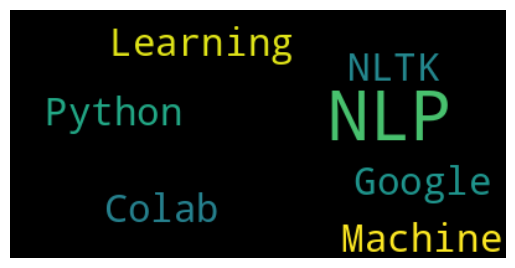

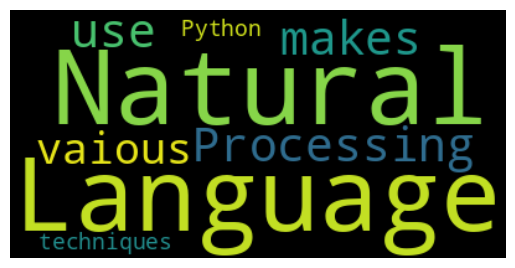

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Example 1
text="Python NLP NLP NLP NLP NLP NLP NLP NLP NLP NLTK Google Colab Machine Learning"
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Example 2
text2="Natural Language Processing makes use of vaious techniques in Python"
wordcloud=WordCloud().generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict
nltk.download('stopwords')
nltk.download('punkt_tab')

def summarize_text(text, summary_length=5):
    # Initialize structures
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text.lower())
    word_freq = defaultdict(int)
    sentence_scores = defaultdict(int)

    # Calculate word frequencies and sentence scoretab
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [word.strip('.,?!;:()') for word in words if word.strip('.,?!;:()') not in stop_words]
        for word in words:
            word_freq[word] += 1
        sentence_scores[sentence] = sum(word_freq[word] for word in words if word in word_freq)

    # Apply bonuses to first and last sentences
    if sentences:
        sentence_scores[sentences[0]] += 2  # Bonus for first sentence
        if len(sentences) > 1:
            sentence_scores[sentences[-1]] += 1  # Bonus for last sentence

    # Rank sentences by score and select top N
    ranked_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
    summary_sentences = [item[0] for item in ranked_sentences[:summary_length]]

    # Join sentences to form the summary
    summary = ' '.join(summary_sentences)
    return summary

# Example usage
sample_text = """In the summer of 1922, I had just arrived in Long Island and was eager to explore the affluent neighborhoods of New York. The atmosphere was filled with the hum of luxurious parties, and the air carried the whispers of secret affairs.
As I drove through the winding roads, the grand mansions stood out with their meticulously groomed lawns and sparkling fountains.
The sound of jazz music drifted through the air, mingling with the laughter of guests dressed in their finest attire.
It was a time of prosperity and excess, but beneath the glittering surface, the cracks of moral decay were beginning to show.
The Great Gatsby, my mysterious neighbor, was at the center of it all, hosting extravagant parties that became the talk of the town.
His enigmatic smile and lavish lifestyle hinted at a deeper story, one that I was determined to uncover."""

summary = summarize_text(sample_text, 2)
print(summary)

the great gatsby, my mysterious neighbor, was at the center of it all, hosting extravagant parties that became the talk of the town. his enigmatic smile and lavish lifestyle hinted at a deeper story, one that i was determined to uncover.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
